## K- Means Clustering 
AnSon Nguyen

Source: 
    https://github.com/jakevdp/PythonDataScienceHandbook
    https://github.com/tiepvupsu/tiepvupsu.github.io

- [1. Example ](#1.-Example)
- [2. Image compression with K-means](#2.-Image-compression-with-K-means)
- [3. Other Example of Coding](#3.-Other-Example-of-Coding)

- Cố định M, tìm Y
$$ \mathbf{y}_i = \arg\min_{\mathbf{y}_i} \sum_{j=1}^K y_{ij}\|\mathbf{x}_i - \mathbf{m}_j\|_2^2 $$
$${subject\_to:} ~~ y_{ij} \in \{0, 1\}~~ \forall j;~~~ \sum_{j = 1}^K y_{ij} = 1$$
$${then: j = \arg\min_{j} \|\mathbf{x}_i - \mathbf{m}_j\|_2^2} $$
- Cố định Y, tìm M
$$\mathbf{m}_j = \arg\min_{\mathbf{m}_j} \sum_{i = 1}^{N} y_{ij}\|\mathbf{x}_i - \mathbf{m}_j \|_2^2 $$
$${take\_derivetive\_argmin\_l(m)}: \frac{\partial l(\mathbf{m}_j)}{\partial \mathbf{m}_j} = 2\sum_{i=1}^N y_{ij}(\mathbf{m}_j - \mathbf{x}_i)  $$
$$\Rightarrow \mathbf{m}_j = \frac{ \sum_{i=1}^N y_{ij} \mathbf{x}_i}{\sum_{i=1}^N y_{ij}} $$


In [2]:
# %load ../../../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.io import loadmat
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy import linalg

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

### 1. Example 

In [4]:
data1 = loadmat('data/ex7data2.mat')
data1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [5]:
X1 = data1['X']
print('X1:', X1.shape)

X1: (300, 2)


In [6]:
km1 = KMeans(3)
km1.fit(X1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

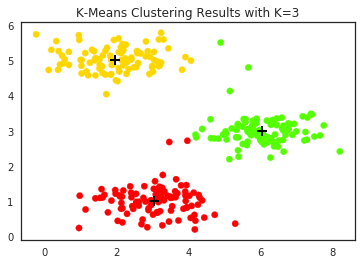

In [7]:
plt.scatter(X1[:,0], X1[:,1], s=40, c=km1.labels_, cmap=plt.cm.prism) 
plt.title('K-Means Clustering Results with K=3')
plt.scatter(km1.cluster_centers_[:,0], km1.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2);

### 2. Image compression with K-means

In [9]:
img = plt.imread('data/bird_small.png')
img_shape = img.shape
img_shape

(128, 128, 3)

In [10]:
A = img/255
AA = A.reshape(128*128,3)
AA.shape

(16384, 3)

In [11]:
km2 = KMeans(16)
km2.fit(AA)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=16, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [12]:
B = km2.cluster_centers_[km2.labels_].reshape(img_shape[0], img_shape[1], 3)

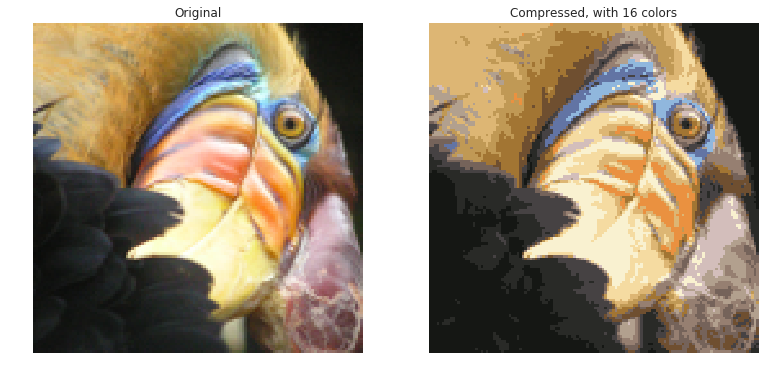

In [13]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,9))
ax1.imshow(img)
ax1.set_title('Original')
ax2.imshow(B*255)
ax2.set_title('Compressed, with 16 colors')

for ax in fig.axes:
    ax.axis('off')

### 3. Other Example of Coding

In [1]:
from __future__ import print_function 
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(11)

In [2]:
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0)
K = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T


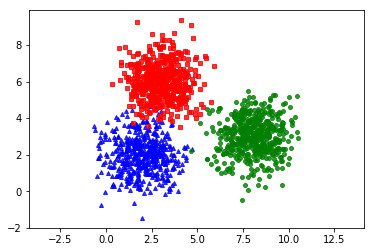

In [3]:
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()
    
kmeans_display(X, original_label)


K-means clustering

Viết các hàm:

    kmeans_init_centers để khởi tạo các centers ban đầu.
    kmeans_asign_labels để gán nhán mới cho các điểm khi biết các centers.
    kmeans_update_centers để cập nhật các centers mới dữa trên dữ liệu vừa được gán nhãn.
    has_converged để kiểm tra điều kiện dừng của thuật toán.


In [4]:
def kmeans_init_centers(X, k):
    # randomly pick k rows of X as initial centers
    return X[np.random.choice(X.shape[0], k, replace=False)]

def kmeans_assign_labels(X, centers):
    # calculate pairwise distances btw data and centers
    D = cdist(X, centers)
    # return index of the closest center
    return np.argmin(D, axis = 1)

def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        # collect all points assigned to the k-th cluster 
        Xk = X[labels == k, :]
        # take average
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers

def has_converged(centers, new_centers):
    # return True if two sets of centers are the same
    return (set([tuple(a) for a in centers]) == 
        set([tuple(a) for a in new_centers]))


In [6]:
def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0 
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it += 1
    return (centers, labels, it)


Centers found by our algorithm:
[[8.03643517 3.02468432]
 [2.98431534 6.03500824]
 [1.9780868  2.0065323 ]]


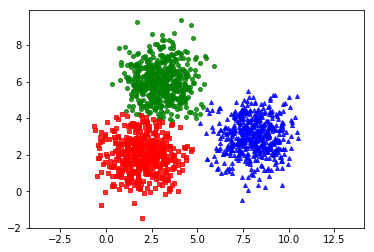

In [9]:
(centers, labels, it) = kmeans(X, K)
print('Centers found by our algorithm:')
print(centers[-1])

kmeans_display(X, labels[-1])


Testing with scikit-learn

Centers found by scikit-learn:
[[8.0410628  3.02094748]
 [2.99357611 6.03605255]
 [1.97634981 2.01123694]]


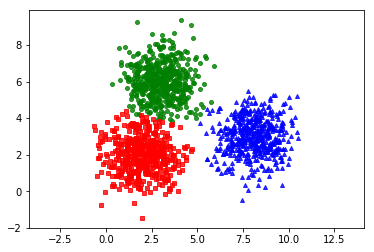

In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
print('Centers found by scikit-learn:')
print(kmeans.cluster_centers_)
pred_label = kmeans.predict(X)
kmeans_display(X, pred_label)
